In [295]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [296]:
df=pd.read_csv('Titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [297]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [298]:
missing_features=[features for features in df.columns if df[features].isnull().sum()>1]
missing_features

['Age', 'Cabin', 'Embarked']

# Missing Values

In [299]:
for feature in missing_features:
    print(feature,np.round(df[feature].isnull().mean(),4),'% missing values')

Age 0.1987 % missing values
Cabin 0.771 % missing values
Embarked 0.0022 % missing values


As Cabin has 77% missing data so we will drop in future.

In [300]:
df['Age']=df['Age'].fillna(df['Age'].mean())

In [301]:
from sklearn.impute import SimpleImputer

In [302]:
imp=SimpleImputer(strategy='most_frequent')

In [303]:
df['Embarked']=imp.fit_transform(df['Embarked'].values.reshape(-1,1))

In [304]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [305]:
categorical_features=[features for features in df.columns if df[features].dtype=='O']
categorical_features

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [306]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualization

([<matplotlib.patches.Wedge at 0x253b8698430>,
 [Text(-0.3925749350994583, 1.0275626113924428, 'Survived'),
  Text(0.3925750313068116, -1.0275625746369201, 'Not Survived')])

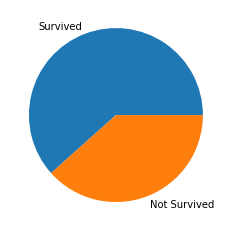

In [307]:
df['Survived'].value_counts()
plt.pie(x=df['Survived'].value_counts(),labels=['Survived','Not Survived'])

Sex       female  male
Survived              
0             81   468
1            233   109


[Text(0.5, 1.0, 'Sex Vs Survived')]

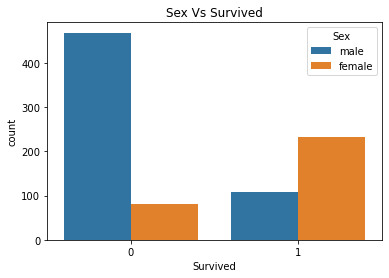

In [308]:
print(pd.crosstab(df['Survived'],df['Sex']))
a=sns.countplot(x='Survived',hue='Sex',data=df)
a.set(title='Sex Vs Survived')

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119


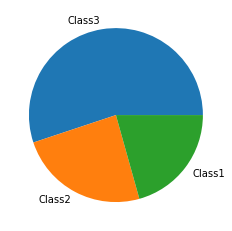

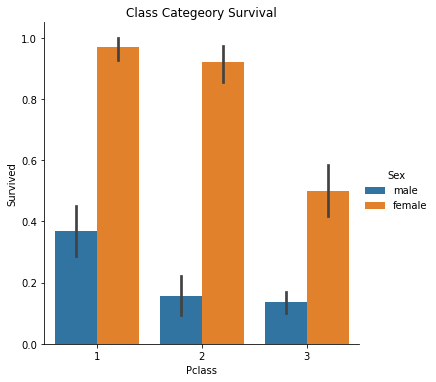

In [309]:
plt.pie(df['Pclass'].value_counts(),labels=['Class3','Class2','Class1'])
print(pd.crosstab(df['Survived'],df['Pclass']))


ax=sns.catplot(x='Pclass',y='Survived',hue='Sex',kind='bar',data=df)
ax.set(title='Class Categeory Survival')
plt.show()

From this Graph we can say that 1st class passengers are survived more than 2nd and 3rd class.and

Female are survived more as compair to male in all class.

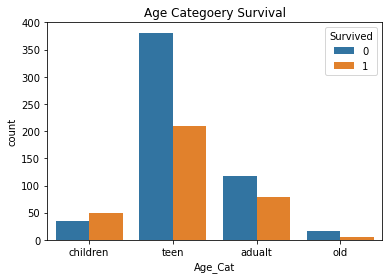

In [310]:
interval=(0,15,35,60,120)
categories=('children','teen','adualt','old')
df['Age_Cat']=pd.cut(df.Age,interval,labels=categories)
ax=sns.countplot(x=df['Age_Cat'],data=df,hue='Survived')
ax.set(title='Age Categoery Survival')
plt.show()

From This Graph we can see that Teen & Adault  are survived more as compair to old.

Survived    0    1
Embarked          
C          75   93
Q          47   30
S         427  219


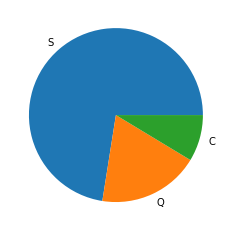

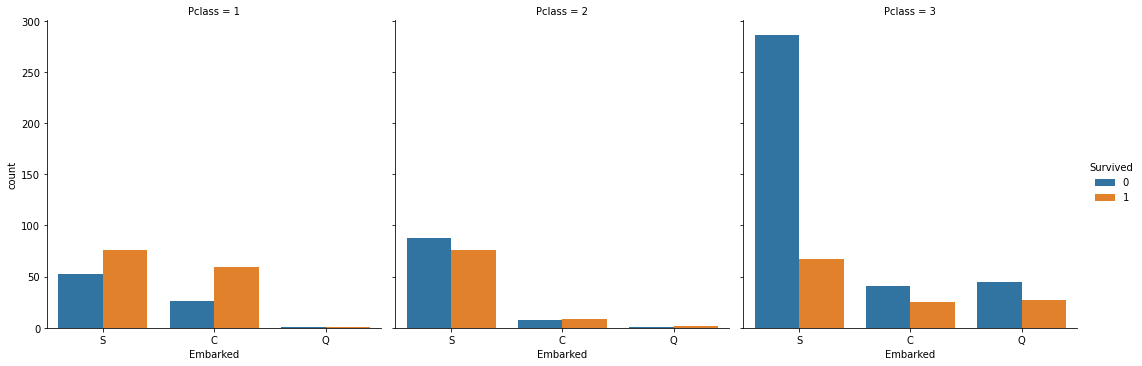

In [311]:
plt.pie(df['Embarked'].value_counts(),labels=['S','Q','C'])

print(pd.crosstab(df['Embarked'],df['Survived']))

cx=sns.catplot(x ='Embarked', hue ='Survived',kind ='count', col ='Pclass', data = df)

Majority of the passenger are borded from S.

For Class1 and Class2 S is more survived as compair to class3.

In [312]:
print("Minimun Fare",df['Fare'].min())
print("Maximum Fare",df['Fare'].max())

Minimun Fare 0.0
Maximum Fare 512.3292


[Text(0.5, 1.0, 'Fare Vs Survived')]

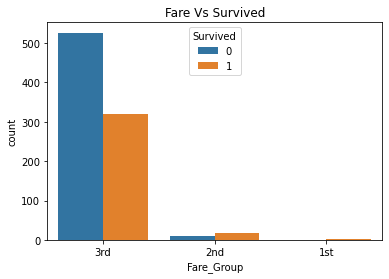

In [313]:
interval=(0,150,300,550)
categories=['3rd','2nd','1st']
df['Fare_Group']=pd.cut(df.Fare,interval,labels=categories)
ax=sns.countplot(x=df['Fare_Group'],data=df,hue='Survived')
ax.set(title='Fare Vs Survived')

From this chart we can say that all pessangers from 1st class are survived as they paid more than 3rd class.

In [314]:
df['Parch'].value_counts()


0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [315]:
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [316]:
df['Family']=df['Parch']+df['SibSp']

In [317]:
print(df['Family'].value_counts())
df.loc[df['Family']>0,'Not_Alone']=0
df.loc[df['Family']==0,'Not_Alone']=1

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: Family, dtype: int64


In [318]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Cat,Fare_Group,Family,Not_Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,teen,3rd,1,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,adualt,3rd,1,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,teen,3rd,0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,teen,3rd,1,0.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,teen,3rd,0,1.0


In [319]:
df['Not_Alone'].value_counts()

1.0    537
0.0    354
Name: Not_Alone, dtype: int64

# Data Cleaning

In [320]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Age','Fare','Family'],axis=1,inplace=True)

In [321]:
df.head()

,Survived,Pclass,Sex,Embarked,Age_Cat,Fare_Group,Not_Alone
0,0,3,male,S,teen,3rd,0.0
1,1,1,female,C,adualt,3rd,0.0
2,1,3,female,S,teen,3rd,1.0
3,1,1,female,S,teen,3rd,0.0
4,0,3,male,S,teen,3rd,1.0


In [322]:
from sklearn.preprocessing import LabelEncoder

In [323]:
lb=LabelEncoder()

In [324]:
l=['Sex','Embarked','Age_Cat','Fare_Group']

for i in l:
    df[i]=lb.fit_transform(df[i])
    
df

,Survived,Pclass,Sex,Embarked,Age_Cat,Fare_Group,Not_Alone
0,0,3,1,2,3,2,0.0
1,1,1,0,0,0,2,0.0
2,1,3,0,2,3,2,1.0
3,1,1,0,2,3,2,0.0
4,0,3,1,2,3,2,1.0
...,...,...,...,...,...,...,...
886,0,2,1,2,3,2,1.0
887,1,1,0,2,3,2,1.0
888,0,3,0,2,3,2,0.0
889,1,1,1,0,3,2,1.0


In [325]:
x=df.drop('Survived',axis=1)
y=df['Survived']
print(y.value_counts())

0    549
1    342
Name: Survived, dtype: int64


# SMOTE

In [326]:
from imblearn.over_sampling import SMOTE

In [327]:
smt=SMOTE()
trainx,trainy=smt.fit_resample(x,y)

In [328]:
trainy.value_counts()

1    549
0    549
Name: Survived, dtype: int64

# Standard Scaler

In [329]:
from sklearn.preprocessing import StandardScaler

In [330]:
std=StandardScaler()

In [331]:
X=std.fit_transform(x)

In [332]:
x=X

In [333]:
from sklearn.model_selection  import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score

In [334]:
lg=LogisticRegression()

# Ramdom State Selection

In [335]:
for i in range(1,500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    lg.fit(x_train,y_train)
    pred_test=lg.predict(x_test)
    pred_train=lg.predict(x_train)
    if round(accuracy_score(y_test,pred_test)*100,1)==round(accuracy_score(y_train,pred_train)*100,1):
        print('Random state',i,'score is well')
        print('test score',accuracy_score(y_test,pred_test)*100)
        print('train score',accuracy_score(y_train,pred_train)*100)

Random state 15 score is well
test score 78.77094972067039
train score 78.79213483146067
Random state 65 score is well
test score 77.6536312849162
train score 77.6685393258427
Random state 193 score is well
test score 78.2122905027933
train score 78.23033707865169
Random state 328 score is well
test score 78.2122905027933
train score 78.23033707865169
Random state 485 score is well
test score 77.6536312849162
train score 77.6685393258427


In [336]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=52)

In [337]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [338]:
svc=SVC()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
gb=GaussianNB()

In [339]:
def fun(f):
    f.fit(x_train,y_train)
    pred=f.predict(x_test)
    print('Accuracy Score',accuracy_score(y_test,pred)*100)
    print('Confusion Matrix\n',confusion_matrix(y_test,pred))
    print('Classification Report\n',classification_report(y_test,pred))
    print('F1 score',f1_score(y_test,pred)*100)

In [340]:
fun(lg)

Accuracy Score 78.2122905027933
Confusion Matrix
 [[96 17]
 [22 44]]
Classification Report
               precision    recall  f1-score   support

           0       0.81      0.85      0.83       113
           1       0.72      0.67      0.69        66

    accuracy                           0.78       179
   macro avg       0.77      0.76      0.76       179
weighted avg       0.78      0.78      0.78       179

F1 score 69.29133858267717


In [341]:
fun(svc)

Accuracy Score 81.56424581005587
Confusion Matrix
 [[106   7]
 [ 26  40]]
Classification Report
               precision    recall  f1-score   support

           0       0.80      0.94      0.87       113
           1       0.85      0.61      0.71        66

    accuracy                           0.82       179
   macro avg       0.83      0.77      0.79       179
weighted avg       0.82      0.82      0.81       179

F1 score 70.79646017699115


In [342]:
fun(dtc)

Accuracy Score 82.68156424581005
Confusion Matrix
 [[106   7]
 [ 24  42]]
Classification Report
               precision    recall  f1-score   support

           0       0.82      0.94      0.87       113
           1       0.86      0.64      0.73        66

    accuracy                           0.83       179
   macro avg       0.84      0.79      0.80       179
weighted avg       0.83      0.83      0.82       179

F1 score 73.04347826086956


In [343]:
fun(knn)

Accuracy Score 79.88826815642457
Confusion Matrix
 [[101  12]
 [ 24  42]]
Classification Report
               precision    recall  f1-score   support

           0       0.81      0.89      0.85       113
           1       0.78      0.64      0.70        66

    accuracy                           0.80       179
   macro avg       0.79      0.77      0.77       179
weighted avg       0.80      0.80      0.79       179

F1 score 70.0


In [344]:
fun(gb)

Accuracy Score 77.09497206703911
Confusion Matrix
 [[93 20]
 [21 45]]
Classification Report
               precision    recall  f1-score   support

           0       0.82      0.82      0.82       113
           1       0.69      0.68      0.69        66

    accuracy                           0.77       179
   macro avg       0.75      0.75      0.75       179
weighted avg       0.77      0.77      0.77       179

F1 score 68.70229007633587


# Ensemble Method

In [345]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

In [346]:
rfc=RandomForestClassifier()
ad=AdaBoostClassifier()
gd=GradientBoostingClassifier()

In [347]:
fun(rfc)
pred=rfc.predict(x_test)

Accuracy Score 81.56424581005587
Confusion Matrix
 [[103  10]
 [ 23  43]]
Classification Report
               precision    recall  f1-score   support

           0       0.82      0.91      0.86       113
           1       0.81      0.65      0.72        66

    accuracy                           0.82       179
   macro avg       0.81      0.78      0.79       179
weighted avg       0.82      0.82      0.81       179

F1 score 72.26890756302522


In [348]:
fun(ad)

Accuracy Score 79.88826815642457
Confusion Matrix
 [[97 16]
 [20 46]]
Classification Report
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       113
           1       0.74      0.70      0.72        66

    accuracy                           0.80       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.80      0.80      0.80       179

F1 score 71.875


In [349]:
fun(gd)

Accuracy Score 82.68156424581005
Confusion Matrix
 [[101  12]
 [ 19  47]]
Classification Report
               precision    recall  f1-score   support

           0       0.84      0.89      0.87       113
           1       0.80      0.71      0.75        66

    accuracy                           0.83       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.83      0.83      0.82       179

F1 score 75.20000000000002


# Cross Validation

In [350]:
from sklearn.model_selection import cross_val_score

In [351]:
for i in range(2,11):
    score=cross_val_score(svc,x,y,cv=i)
    print(i)
    print(score.mean()*100)

2
77.22023479619087
3
79.01234567901234
4
80.58366662626753
5
79.91274872889335
6
79.79775077090513
7
80.58387232845894
8
79.68850546975548
9
80.58361391694724
10
80.69413233458178


In [352]:
score=cross_val_score(dtc,x,y,cv=4)
print(score.mean()*100)

80.13624611158244


In [353]:
score=cross_val_score(knn,x,y,cv=4)
print(score.mean()*100)

78.45463176180665


In [354]:
score=cross_val_score(gb,x,y,cv=4)
print(score.mean()*100)

75.31208338383226


In [355]:
score=cross_val_score(rfc,x,y,cv=4)
print(score.mean()*100)

80.13624611158244


In [356]:
score=cross_val_score(ad,x,y,cv=4)
print(score.mean()*100)

79.12677251242273


In [357]:
score=cross_val_score(gd,x,y,cv=4)
print(score.mean()*100)

80.47357896012603


# Hyper Tuning

In [358]:
from sklearn.model_selection import GridSearchCV

In [359]:
p1={'n_neighbors':[1,2,3,4,5],'weights':['uniform','distance'],'algorithm':['auto','ball_tree','kd_tree','brute'],'p':[1,2,3,4]}

In [360]:
gd=GridSearchCV(knn,p1)
gd.fit(x,y)
print(gd.best_params_)

{'algorithm': 'auto', 'n_neighbors': 4, 'p': 1, 'weights': 'distance'}


In [361]:
knn1=KNeighborsClassifier(algorithm='brute',n_neighbors=3,p=3,weights='uniform')
fun(knn1)

Accuracy Score 77.09497206703911
Confusion Matrix
 [[94 19]
 [22 44]]
Classification Report
               precision    recall  f1-score   support

           0       0.81      0.83      0.82       113
           1       0.70      0.67      0.68        66

    accuracy                           0.77       179
   macro avg       0.75      0.75      0.75       179
weighted avg       0.77      0.77      0.77       179

F1 score 68.21705426356588


In [362]:
p2={'n_estimators':[10,50,100,250,500],'max_depth':[1,2,3,4,5],'max_features':['auto','sqrt','log2']}
gd1=GridSearchCV(rfc,p2)
gd1.fit(x,y)
print(gd1.best_params_)

{'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 10}


In [363]:
rfc1=RandomForestClassifier(max_depth=5,max_features='sqrt',n_estimators=100)

In [364]:
fun(rfc1)

Accuracy Score 81.00558659217877
Confusion Matrix
 [[102  11]
 [ 23  43]]
Classification Report
               precision    recall  f1-score   support

           0       0.82      0.90      0.86       113
           1       0.80      0.65      0.72        66

    accuracy                           0.81       179
   macro avg       0.81      0.78      0.79       179
weighted avg       0.81      0.81      0.81       179

F1 score 71.66666666666667


In [365]:
p3={'criterion':['ginny','entropy'],'splitter':['best','random'],'max_features':['none','auto','sqrt','log2'],'max_depth':[1,2,3,4,5]}
gd=GridSearchCV(dtc,p3)
gd.fit(x,y)
print(gd.best_params_)

{'criterion': 'entropy', 'max_depth': 4, 'max_features': 'log2', 'splitter': 'best'}


In [366]:
dtc1=DecisionTreeClassifier(criterion='entropy',max_depth=5,max_features='log2',splitter='best')

In [367]:
fun(dtc1)

Accuracy Score 81.00558659217877
Confusion Matrix
 [[105   8]
 [ 26  40]]
Classification Report
               precision    recall  f1-score   support

           0       0.80      0.93      0.86       113
           1       0.83      0.61      0.70        66

    accuracy                           0.81       179
   macro avg       0.82      0.77      0.78       179
weighted avg       0.81      0.81      0.80       179

F1 score 70.17543859649123


# Voting Classifier

In [368]:
from sklearn.ensemble import VotingClassifier

In [369]:
estimator=[]

estimator.append(('svc',SVC()))
estimator.append(('dtc',DecisionTreeClassifier()))
estimator.append(('knn',KNeighborsClassifier()))

In [370]:
vot_hard=VotingClassifier(estimators=estimator,voting='hard')
vot_hard.fit(x_train,y_train)
y_pred=vot_hard.predict(x_test)
print(y_pred)
#usint accuracy score
score=(accuracy_score(y_test,y_pred))
print('hard voting score % d'%score)

[1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 1
 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0
 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 1 1 1
 0 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0]
hard voting score  0


# AUC ROC CURVE

In [371]:
from sklearn.metrics import roc_curve,roc_auc_score

In [372]:
y_pred_prob=rfc.predict_proba(x_test)[:,1]

In [373]:
y_pred_prob

array([0.86278848, 0.11973597, 0.08644937, 0.41404584, 0.50256818,
       0.26482937, 1.        , 0.08644937, 0.12016361, 0.11903657,
       0.11973597, 0.11903657, 0.50256818, 0.49870482, 0.        ,
       0.30792244, 0.12016361, 0.49870482, 0.12016361, 0.12016361,
       0.11973597, 0.81412367, 0.11903657, 0.26482937, 0.08644937,
       0.12016361, 0.41404584, 0.67383333, 0.04508333, 0.71044356,
       0.44539626, 0.86278848, 0.12016361, 0.28259127, 0.42236715,
       0.37151493, 0.44539626, 0.12016361, 0.96896446, 0.11903657,
       0.34942961, 0.11903657, 0.47807864, 0.50256818, 1.        ,
       0.12016361, 0.53004177, 0.12016361, 0.41404584, 0.06089686,
       0.41404584, 0.47807864, 0.12016361, 0.        , 0.53004177,
       0.97516667, 0.28751768, 0.06573775, 0.12016361, 0.12016361,
       0.        , 0.29584957, 0.49362771, 0.11903657, 1.        ,
       0.09082661, 1.        , 0.11973597, 0.12016361, 0.        ,
       0.7288299 , 0.99045455, 0.71044356, 1.        , 0.44539

In [374]:
fpr,tpr,thersholds=roc_curve(y_test,y_pred_prob)

In [375]:
print('ROC Score',roc_auc_score(y_test,pred))

ROC Score 0.7815097881469563


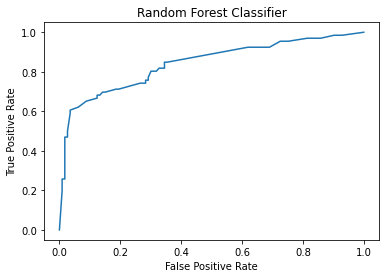

In [376]:
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Classifier')
plt.show()

# Model Saving

In [377]:
import pickle
filename='Titanic_Prediction.pkl'
pickle.dump(rfc,open(filename,'wb'))

# Conclusion

In [378]:
res=pd.DataFrame()
res['Actual']=y_test
res['Predict']=rfc.predict(x_test)

print(res)

     Actual  Predict
580       1        1
841       0        0
406       0        0
394       1        0
453       1        1
..      ...      ...
338       1        0
53        1        1
184       1        0
751       1        0
711       0        0

[179 rows x 2 columns]
